In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import os

Pipeline:

- linearly decreasing numbers for size of rectangles along y axis (tuples)
- jittered tuple vertices along x axis
- linearly increasing density of rectangles along y axis
- randomly chosen integer from three options for color

In [2]:
def pick_prob_array(len_array, order):

    prob_vals = np.random.dirichlet(range(len_array))
    asc_order = np.sort(prob_vals)
    desc_order = asc_order[::-1]
    
    if order:
        probs = asc_order
    else:
        probs = desc_order
    return probs
    

In [21]:
def get_params(x_range, y_range):

    x = np.linspace(0, x_range, x_range)
    
    x_start_coord = np.ceil(np.linspace(1, x_range, y_range)).astype(int)
    xp = []
    yp = []
    w = []
    h = []
    for i in range(y_range):
        if i > 0:
            y = np.array([i] * len(x))
            y_jitter = np.random.beta(0.5, i*5, x_range)
            x_jitter = np.random.beta(0.5, i*30, x_range)
            x_pos_start = x_start_coord[y_range-i]
            if i != y_range-1:
                x_start = np.random.choice(range(x_pos_start), y_range-i, replace=False)
            x_pos = x[x_start] + x_jitter[x_start]
            y_pos = y[x_start] + y_jitter[x_start]
            if i < x_range/2:
                modifier = 4
            else:
                modifier = 1
            w_h_vals = range(1, modifier*i)
            width_prob = pick_prob_array(len(w_h_vals), 0)
            height_prob = pick_prob_array(len(w_h_vals), 1)
            width = np.random.choice(w_h_vals, size=len(x_start), replace=True, p=width_prob)
            height = np.random.choice(w_h_vals, size=len(x_start), replace=True, p=height_prob) 
        else:
            y = np.ones(len(x))
            x_pos = x
            y_pos = y
            width = np.ones(len(x_pos))
            height = np.ones(len(x_pos))
        xp.append(x_pos)
        yp.append(y_pos)
        w.append(width)
        h.append(height)
            
    return xp, yp, w, h
    


In [22]:
def plot_save(x_range, y_range):
    x, y, w, h = get_params(x_range, y_range)

    fig1 = plt.figure(figsize=(15,12))
    ax1 = fig1.add_subplot(111)

    c_opts = ["#BFFF00", "#ade2e6", "#f88379"]
    for x_, y_, xe, ye in zip(x, y, w, h):
        col_col = np.random.choice(c_opts)
        for pts in range(len(x_)):            
            rect = Rectangle((x_[pts], y_[pts]), xe[pts], ye[pts], alpha=0.2, linewidth=2, fill=False, color=col_col)
            ax1.add_patch(rect)
        
    ax1.plot()
    
    plt.savefig(os.path.join('/Users/vassiki/Desktop/rects/','width{0}_height{1}.png'.format(x_range, y_range)))

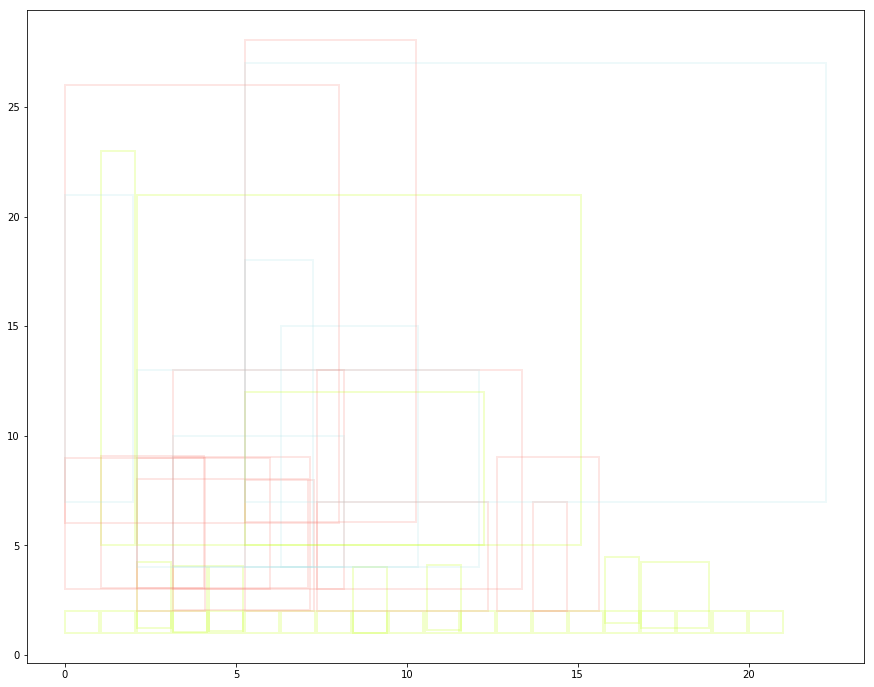

In [27]:
plot_save(20, 8)

In [14]:
def get_params_no_prob(x_range, y_range):

    x = np.linspace(0, x_range, x_range)
    
    x_start_coord = np.ceil(np.linspace(1, x_range, y_range)).astype(int)
    xp = []
    yp = []
    w = []
    h = []
    for i in range(1,y_range):
        y = np.array([i] * len(x))
        y_jitter = np.random.beta(0.5, i*5, x_range)
        x_jitter = np.random.beta(0.5, i*30, x_range)
        x_pos_start = x_start_coord[y_range-i]
        if i != y_range-1:
            x_start = np.random.choice(range(x_pos_start), y_range-i, replace=False)
        x_pos = x[x_start] + x_jitter[x_start]
        y_pos = y[x_start] + y_jitter[x_start]
        if i < x_range/2:
            modifier = 4
        else:
            modifier = 1
        w_h_vals = range(1, modifier*i)

        width = np.random.choice(w_h_vals, size=len(x_start))
        height = np.random.choice(w_h_vals, size=len(x_start)) 

        xp.append(x_pos)
        yp.append(y_pos)
        w.append(width)
        h.append(height)
            
    return xp, yp, w, h

In [15]:
def plot_save_no_prob(x_range, y_range):
    x, y, w, h = get_params_no_prob(x_range, y_range)

    fig1 = plt.figure(figsize=(15,12))
    ax1 = fig1.add_subplot(111)

    c_opts = ["#BFFF00", "#ade2e6", "#f88379"]
    for x_, y_, xe, ye in zip(x, y, w, h):
        col_col = np.random.choice(c_opts)
        for pts in range(len(x_)):            
            rect = Rectangle((x_[pts], y_[pts]), xe[pts], ye[pts], alpha=0.2, linewidth=2, fill=False, color=col_col)
            ax1.add_patch(rect)
        
    ax1.plot()
    
    plt.savefig(os.path.join('/Users/vassiki/Desktop/rects/','width{0}_height{1}_no_prob.png'.format(x_range, y_range)))

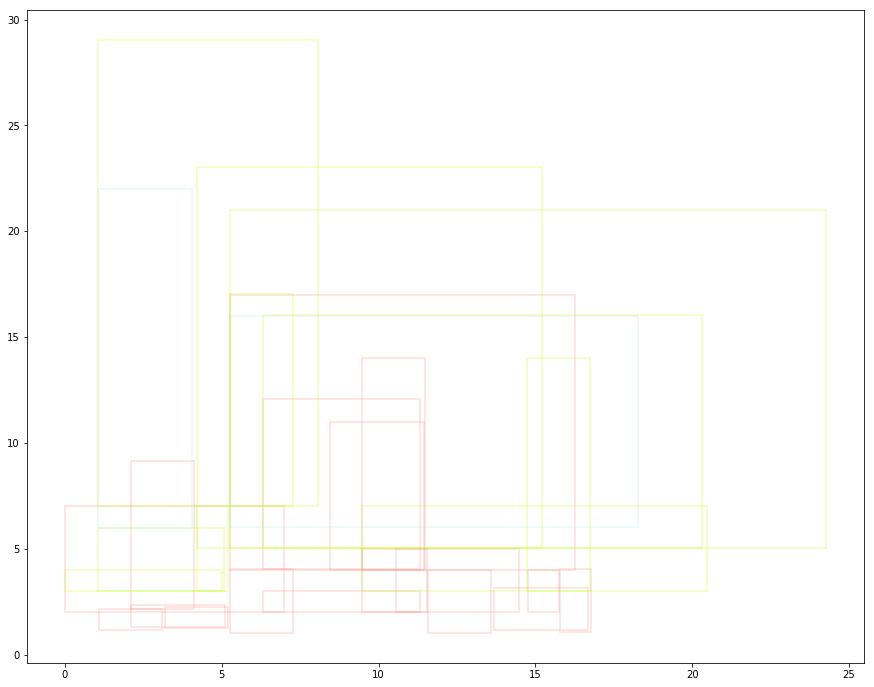

In [20]:
plot_save_no_prob(20, 8)